# **Telco Customer Churn - Logistic Regression**

### *Import Libraries*

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns

### **Load the dataset**

In [2]:
data = pd.read_csv('churn_data.csv')

In [3]:
data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   tenure            7042 non-null   int64  
 2   PhoneService      7042 non-null   object 
 3   Contract          7042 non-null   object 
 4   PaperlessBilling  7042 non-null   object 
 5   PaymentMethod     7042 non-null   object 
 6   MonthlyCharges    7042 non-null   float64
 7   TotalCharges      7042 non-null   object 
 8   Churn             7042 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


### **Preprocessing**

### *Converting Data Types*

Since the data type of `TotalCharges` is `object` even though it is numerical, it should be converted to `float`.

In [5]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [6]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7042.000000,7042.000000,7031.000000
mean,32.366373,64.755886,2282.651714
std,24.557955,30.088238,2266.279660
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.400000
50%,29.000000,70.350000,1397.300000
75%,55.000000,89.850000,3793.050000
max,72.000000,118.750000,8684.800000


### *Handle Missing Values*

In [7]:
data.isnull().sum()

customerID           0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
null_total_charges_dataset = data[data['TotalCharges'].isnull()]
data.loc[(data['TotalCharges'].isnull()) & (data['tenure'] == 0), 'TotalCharges'] = data['MonthlyCharges']

### *Data Reduction*

In [9]:
cols_to_drop = [
    'customerID',
]

data = data.drop(columns=cols_to_drop)

### *Label Encoding*

In [10]:
encoder = LabelEncoder()
data['PhoneService'] = encoder.fit_transform(data['PhoneService'])
data['Contract'] = encoder.fit_transform(data['Contract'])
data['PaperlessBilling'] = encoder.fit_transform(data['PaperlessBilling'])
data['PaymentMethod'] = encoder.fit_transform(data['PaymentMethod'])
data['Churn'] = encoder.fit_transform(data['Churn'])

In [11]:
data.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,2,29.85,29.85,0
1,34,1,1,0,3,56.95,1889.50,0
2,2,1,0,1,3,53.85,108.15,1
3,45,0,1,0,0,42.30,1840.75,0
4,2,1,0,1,2,70.70,151.65,1


### *Getting the inputs and output*

In [12]:
X = data.iloc[:,0:-1].values
y = data.iloc[:,-1].values

### *Independent Variables*

In [13]:
X

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.0000e+00, 2.9850e+01,
        2.9850e+01],
       [3.4000e+01, 1.0000e+00, 1.0000e+00, ..., 3.0000e+00, 5.6950e+01,
        1.8895e+03],
       [2.0000e+00, 1.0000e+00, 0.0000e+00, ..., 3.0000e+00, 5.3850e+01,
        1.0815e+02],
       ...,
       [7.2000e+01, 1.0000e+00, 1.0000e+00, ..., 1.0000e+00, 1.0320e+02,
        7.3629e+03],
       [1.1000e+01, 0.0000e+00, 0.0000e+00, ..., 2.0000e+00, 2.9600e+01,
        3.4645e+02],
       [4.0000e+00, 1.0000e+00, 0.0000e+00, ..., 3.0000e+00, 7.4400e+01,
        3.0660e+02]], shape=(7042, 7))

### *Dependent Variable*

In [14]:
y

array([0, 0, 1, ..., 0, 0, 1], shape=(7042,))

### *Creating the Training Set and Test Set*

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
X_train

array([[3.70000e+01, 1.00000e+00, 2.00000e+00, ..., 1.00000e+00,
        6.14500e+01, 2.30235e+03],
       [9.00000e+00, 1.00000e+00, 0.00000e+00, ..., 2.00000e+00,
        8.08500e+01, 7.51650e+02],
       [2.10000e+01, 1.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        7.59000e+01, 1.54975e+03],
       ...,
       [5.80000e+01, 1.00000e+00, 2.00000e+00, ..., 3.00000e+00,
        2.07500e+01, 1.18595e+03],
       [1.00000e+00, 1.00000e+00, 0.00000e+00, ..., 2.00000e+00,
        6.97500e+01, 6.97500e+01],
       [4.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.04000e+01, 9.45000e+01]], shape=(5633, 7))

In [17]:
X_test

array([[4.10000e+01, 1.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        1.95000e+01, 7.98200e+02],
       [6.60000e+01, 1.00000e+00, 2.00000e+00, ..., 0.00000e+00,
        6.69000e+01, 4.37025e+03],
       [2.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        4.49000e+01, 1.11050e+02],
       ...,
       [3.40000e+01, 0.00000e+00, 1.00000e+00, ..., 3.00000e+00,
        6.12500e+01, 1.99320e+03],
       [5.00000e+00, 1.00000e+00, 0.00000e+00, ..., 2.00000e+00,
        6.97500e+01, 3.24600e+02],
       [4.90000e+01, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        9.08500e+01, 4.51585e+03]], shape=(1409, 7))

In [18]:
y_train

array([0, 1, 0, ..., 0, 1, 0], shape=(5633,))

In [19]:
y_test

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

### *Feature Scaling*

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [21]:
X_train

array([[ 0.18753331,  0.32227391,  1.57801492, ..., -0.54256361,
        -0.11511026,  0.00662442],
       [-0.95255704,  0.32227391, -0.82213576, ...,  0.39407777,
         0.53106919, -0.67634693],
       [-0.46394689,  0.32227391,  0.37793958, ..., -1.47920498,
         0.3661935 , -0.32484152],
       ...,
       [ 1.04260108,  0.32227391,  1.57801492, ...,  1.33071914,
        -1.47075477, -0.48506915],
       [-1.27829714,  0.32227391, -0.82213576, ...,  0.39407777,
         0.16134796, -0.97667462],
       [-1.15614461,  0.32227391, -0.82213576, ..., -0.54256361,
        -1.48241264, -0.96577403]], shape=(5633, 7))

### *Building the Model*

In [22]:
model = LogisticRegression(random_state = 0)

### *Training the Model*

In [23]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### *Inference*

In [24]:
y_pred = model.predict(sc.transform(X_test))
y_pred

array([0, 0, 0, ..., 0, 1, 0], shape=(1409,))

Making the prediction for `Churn` with the following independent varibles.

1. tenure
2. PhoneService
3. Contract
4. PaperlessBilling
5. PaymentMethod
6. MonthlyCharges
7. TotalCharges

In [25]:
# Enter the independent variables
model.predict(sc.transform([[62,1,1,0,0,56.15,3487.95]]))

array([0])

In [26]:
# For reference
data.head(10)

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,2,29.85,29.85,0
1,34,1,1,0,3,56.95,1889.50,0
2,2,1,0,1,3,53.85,108.15,1
3,45,0,1,0,0,42.30,1840.75,0
4,2,1,0,1,2,70.70,151.65,1
5,8,1,0,1,2,99.65,820.50,1
6,22,1,0,1,1,89.10,1949.40,0
7,10,0,0,0,3,29.75,301.90,0
8,28,1,0,1,2,104.80,3046.05,1
9,62,1,1,0,0,56.15,3487.95,0


### **Model Evaluation**

### *Accuracy*

In [27]:
accuracy_score(y_test,y_pred)

0.794889992902768

### *Confusion Matrix*

<Figure size 300x300 with 0 Axes>

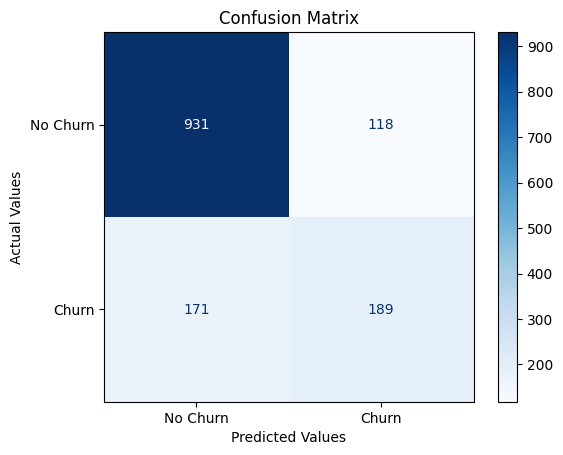

In [37]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(3,3))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap=plt.cm.Blues)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")
plt.show()

### *Precision, Recall, F1 Score*

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1049
           1       0.62      0.53      0.57       360

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



### *ROC Curve*

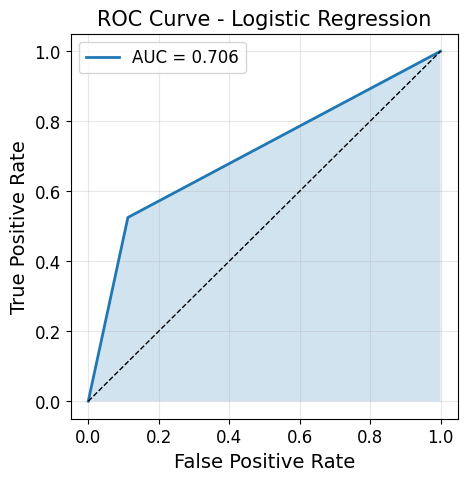

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, linewidth=2, label=f"AUC = {roc_auc:.3f}")
plt.fill_between(fpr, tpr, alpha=0.2)
plt.plot([0,1], [0,1], 'k--', linewidth=1)
plt.title("ROC Curve - Logistic Regression", fontsize=15)
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### **Visualizations**

### *Bar Plot*

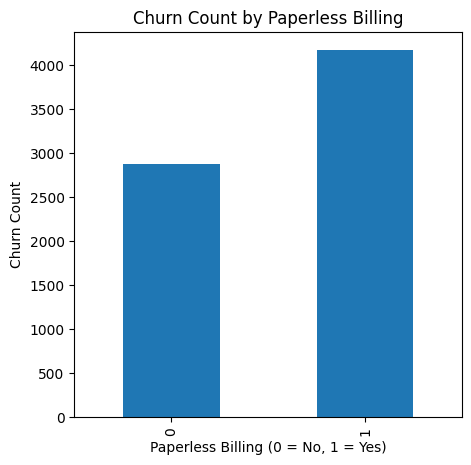

In [38]:
churn_count = data.groupby('PaperlessBilling')['Churn'].count()
plt.figure(figsize=(5,5))
churn_count.plot(kind='bar')
plt.title("Churn Count by Paperless Billing")
plt.xlabel("Paperless Billing (0 = No, 1 = Yes)")
plt.ylabel("Churn Count")
plt.show()

### *Grouped Heatmap*

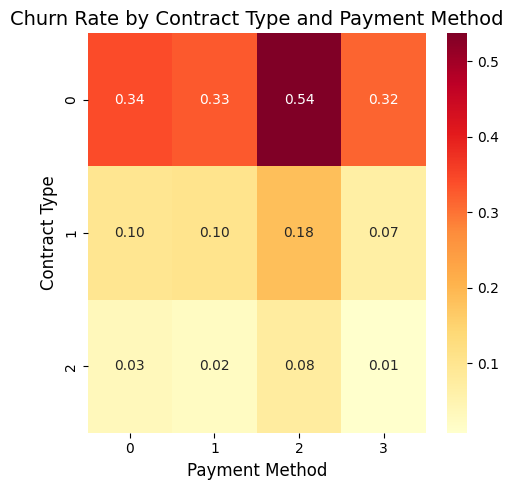

In [39]:
grouped = data.groupby(['Contract', 'PaymentMethod'])['Churn'].mean().reset_index()
pivot_table = grouped.pivot(index='Contract', columns='PaymentMethod', values='Churn')
plt.figure(figsize=(5, 5))
sns.heatmap(pivot_table, annot=True, cmap='YlOrRd', fmt=".2f")
plt.title("Churn Rate by Contract Type and Payment Method", fontsize=14)
plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Contract Type", fontsize=12)
plt.tight_layout()
plt.show()

# Contract Type:             Payment Method:
# 0 = Month-to-month         0 = Bank transfer
# 1 = One year               1 = Credit card
# 2 = Two year               2 = Electronic check
#                            3 = Mailed check

### *Scatter Plot*

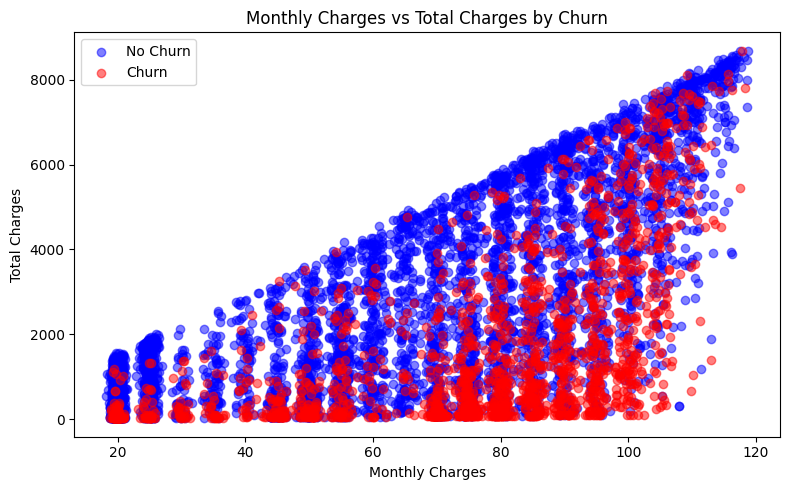

In [33]:
plt.figure(figsize=(8,5))
plt.scatter(
    data[data['Churn']==0]['MonthlyCharges'],
    data[data['Churn']==0]['TotalCharges'],
    c='blue', label='No Churn', alpha=0.5
)
plt.scatter(
    data[data['Churn']==1]['MonthlyCharges'],
    data[data['Churn']==1]['TotalCharges'],
    c='red', label='Churn', alpha=0.5
)
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.title('Monthly Charges vs Total Charges by Churn')
plt.legend()
plt.tight_layout()
plt.show()

### **Insights**

1. **Model Performance**
    
    The logistic regression model showed good overall performance based on accuracy, precision, recall, and the ROC curve. The results indicate that the model can reliably classify customers who are likely to churn and those who are not. Although the performance is not perfect, it is acceptable for generating useful business insights.

2. **Feature behavior**

    The analysis showed that features such as contract type, tenure, and monthly charges have the strongest influence on churn. Customers with month-to-month contracts had a noticeably higher churn rate. Customers with longer tenure tended to stay, while higher monthly charges increased the likelihood of churn. These patterns highlight which customer groups are more at risk.

3. **Interpretation of results**

    Based on the model outputs, customers who leave usually have short tenure and higher monthly bills. This suggests that new customers may still be evaluating the service and can easily switch if they are not satisfied. The results also show that payment and billing preferences can affect churn behavior, which may be connected to customer convenience or satisfaction.

4. **Improvement suggestions**

    The model can be improved by addressing class imbalance if churn cases are fewer than non-churn cases. Techniques such as class weighting or SMOTE may help improve recall for the minority class. Additional customer data, such as service complaint history or usage behavior, could also strengthen the model. Testing other machine learning models like Random Forest or XGBoost may provide higher accuracy and better overall performance.